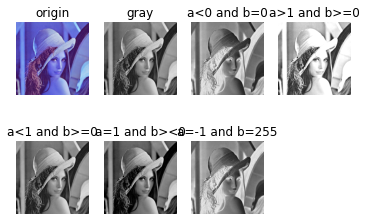

In [4]:
# 图像线性变换
import matplotlib.pyplot as plt
import numpy as np

# 彩色图像每个像素值是[x,y,z], 灰度图像每个像素值便是一个np.uint8
image = cv2.imread('./lena.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 图像大小调整
ori_h, ori_w = image.shape[:2]
height, width = gray_img.shape[:2]
image = cv2.resize(image, (int(ori_w / ori_h * 400), 400), interpolation=cv2.INTER_CUBIC)
gray_img = cv2.resize(gray_img, (int(width / height * 400), 400), interpolation=cv2.INTER_CUBIC)

# a<0 and b=0: 图像的亮区域变暗，暗区域变亮
a, b = -0.5, 0
new_img1 = np.ones((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
for i in range(new_img1.shape[0]):
    for j in range(new_img1.shape[1]):
        new_img1[i][j] = gray_img[i][j] * a + b

# a>1: 增强图像的对比度,图像看起来更加清晰
a, b = 1.5, 20
new_img2 = np.ones((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
for i in range(new_img2.shape[0]):
    for j in range(new_img2.shape[1]):
        if gray_img[i][j] * a + b > 255:
            new_img2[i][j] = 255
        else:
            new_img2[i][j] = gray_img[i][j] * a + b

# a<1: 减小了图像的对比度, 图像看起来变暗
a, b = 0.5, 0
new_img3 = np.ones((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
for i in range(new_img3.shape[0]):
    for j in range(new_img3.shape[1]):
        new_img3[i][j] = gray_img[i][j] * a + b

# a=1且b≠0, 图像整体的灰度值上移或者下移, 也就是图像整体变亮或者变暗, 不会改变图像的对比度
a, b = 1, -50
new_img4 = np.ones((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
for i in range(new_img4.shape[0]):
    for j in range(new_img4.shape[1]):
        pix = gray_img[i][j] * a + b
        if pix > 255:
            new_img4[i][j] = 255
        elif pix < 0:
            new_img4[i][j] = 0
        else:
            new_img4[i][j] = pix

# a=-1, b=255, 图像翻转
new_img5 = 255 - gray_img

plt.subplot(241), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(242), plt.imshow(gray_img, cmap='gray')
plt.title('gray')
plt.axis('off')

plt.subplot(243), plt.imshow(new_img1, cmap='gray')
plt.title('a<0 and b=0')
plt.axis('off')

plt.subplot(244), plt.imshow(new_img2, cmap='gray')
plt.title('a>1 and b>=0')
plt.axis('off')

plt.subplot(245), plt.imshow(new_img3, cmap='gray')
plt.title('a<1 and b>=0')
plt.axis('off')

plt.subplot(246), plt.imshow(new_img4, cmap='gray')
plt.title('a=1 and b><0')
plt.axis('off')

plt.subplot(247), plt.imshow(new_img5, cmap='gray')
plt.title('a=-1 and b=255')
plt.axis('off')
plt.show()

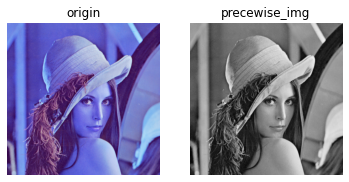

In [5]:
# 图像分段线性变换之对比度拉伸

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./lena.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 在灰度图进行分段线性对比度拉伸
# 此种方式变换函数把灰度级由原来的线性拉伸到整个范围[0, 255]
r_min, r_max = 255, 0
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if gray_img[i, j] > r_max:
            r_max = gray_img[i, j]
        if gray_img[i, j] < r_min:
            r_min = gray_img[i, j]
r1, s1 = r_min, 0
r2, s2 = r_max, 255

precewise_img = np.zeros((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
k1 = s1 / r1
k3 = (255 - s2) / (255 - r2)
k2 = (s2 - s1) / (r2 - r1)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if r1 <= gray_img[i, j] <= r2:
            precewise_img[i, j] = k2 * (gray_img[i, j] - r1)
        elif gray_img[i, j] < r1:
            precewise_img[i, j] = k1 * gray_img[i, j]
        elif gray_img[i, j] > r2:
            precewise_img[i, j] = k3 * (gray_img[i, j] - r2)

plt.subplot(121), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(122), plt.imshow(precewise_img, cmap='gray')
plt.title('precewise_img')
plt.axis('off')
plt.show()

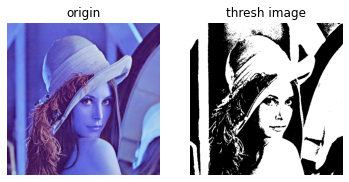

In [6]:
# 图像分段线性变换之阈值处理

image = cv2.imread('./lena.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#阈值处理函数：当r1=r2, s1=0, s2=L-1时，此时分段线性函数便是阈值处理函数
plist = []
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        plist.append(gray_img[i, j])
r_avg = int(sum(plist)/len(plist))
thresh_img = np.zeros((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if gray_img[i, j] < r_avg:
            thresh_img[i, j] = 0
        else:
            thresh_img[i, j] = 255

plt.subplot(121), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(122), plt.imshow(thresh_img, cmap='gray')
plt.title('thresh image')
plt.axis('off')
plt.show()

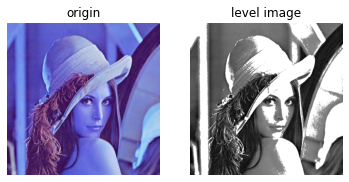

In [7]:
# 分段线性变换应用之灰度级分层

import cv2
import numpy as np

# 在某一范围(A, B)突出灰度，其他灰度值保持不变
image = cv2.imread('./lena.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

r_left, r_right = 150, 230
r_min, r_max = 0, 255
level_img = np.zeros((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if r_left <= gray_img[i, j] <= r_right:
            level_img[i, j] = r_max
        else:
            level_img[i, j] = gray_img[i, j]

plt.subplot(121), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(122), plt.imshow(level_img, cmap='gray')
plt.title('level image')
plt.axis('off')
plt.show()

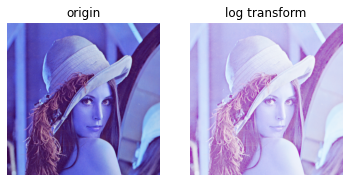

In [8]:
# 对数变换

import cv2
import numpy as np
import math

image = cv2.imread('./lena.png')
log_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        log_img[i, j, 0] = math.log(1 + image[i, j, 0])
        log_img[i, j, 1] = math.log(1 + image[i, j, 1])
        log_img[i, j, 2] = math.log(1 + image[i, j, 2])
cv2.normalize(log_img, log_img, 0, 255, cv2.NORM_MINMAX)
log_img = cv2.convertScaleAbs(log_img)

plt.subplot(121), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(122), plt.imshow(log_img, cmap='gray')
plt.title('log transform')
plt.axis('off')
plt.show()

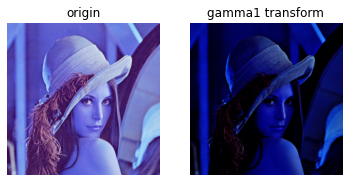

In [9]:
# 当φ > 1时幂变换

image = cv2.imread('./lena.png')
gamma_img1 = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        gamma_img1[i, j, 0] = math.pow(image[i, j, 0], 5)
        gamma_img1[i, j, 1] = math.pow(image[i, j, 1], 5)
        gamma_img1[i, j, 2] = math.pow(image[i, j, 2], 5)
cv2.normalize(gamma_img1, gamma_img1, 0, 255, cv2.NORM_MINMAX)
gamma_img1 = cv2.convertScaleAbs(gamma_img1)

plt.subplot(121), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(122), plt.imshow(gamma_img1, cmap='gray')
plt.title('gamma1 transform')
plt.axis('off')
plt.show()

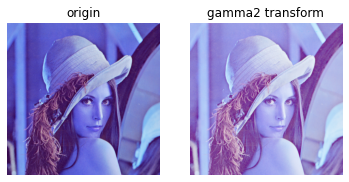

In [10]:
# 当φ < 1时幂变换
image = cv2.imread('./lena.png')
gamma_img2 = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        gamma_img2[i, j, 0] = math.pow(image[i, j, 0], 0.4)
        gamma_img2[i, j, 1] = math.pow(image[i, j, 1], 0.4)
        gamma_img2[i, j, 2] = math.pow(image[i, j, 2], 0.4)
cv2.normalize(gamma_img2, gamma_img2, 0, 255, cv2.NORM_MINMAX)
gamma_img2 = cv2.convertScaleAbs(gamma_img2)
plt.subplot(121), plt.imshow(image, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(122), plt.imshow(gamma_img2, cmap='gray')
plt.title('gamma2 transform')
plt.axis('off')
plt.show()

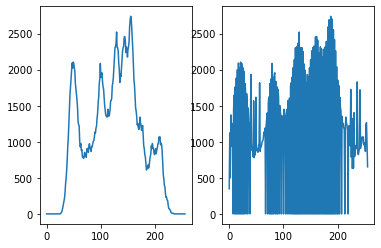

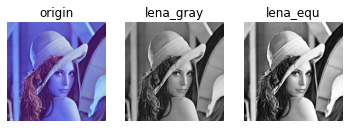

In [12]:
# 直方图均衡化

import cv2
import matplotlib.pyplot as plt

wiki_img = cv2.imread('./lena.png')
wiki_gray = cv2.cvtColor(wiki_img, cv2.COLOR_BGR2GRAY)

#对图像进行均衡化处理，增强图像对比度
wiki_equ = cv2.equalizeHist(wiki_gray)

hist = cv2.calcHist([wiki_gray], [0], None, [256], [0, 256])
equ_hist = cv2.calcHist([wiki_equ], [0], None, [256], [0, 256])
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(equ_hist)
plt.show()

plt.subplot(131), plt.imshow(wiki_img, cmap=None)
plt.title('origin')
plt.axis('off')

plt.subplot(132), plt.imshow(wiki_gray, cmap='gray')
plt.title('lena_gray')
plt.axis('off')

plt.subplot(133), plt.imshow(wiki_equ, cmap='gray')
plt.title('lena_equ')
plt.axis('off')
plt.show()